In [4]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [5]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN samples.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
river='Rouge_R'

In [8]:
location = (42.325167, -83.242128)

In [9]:
delta_xy = 0.5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [10]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride")  & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3151, 63)

In [11]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [12]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
# ["21MICH_WQX-740385", True],
["USGS-04168550", True],
["21MICH_WQX-820070", True],
["USGS-04167150", True],
["21MICH_WQX-821522", False],
["USGS-04166500", True],
["USGS-422154083244706", False],
]

ignore_indx = [2,3]

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
#         location=[st_df.LatitudeMeasure.values[0]+0.0235,st_df.LongitudeMeasure.values[0]-0.1026], # 10 km
        location=[st_df.LatitudeMeasure.values[0]+0.0135,st_df.LongitudeMeasure.values[0]-0.0526], # 5km
#         location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031,st_df.LongitudeMeasure.values[0]-0.013], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m






USGS-04168550
21MICH_WQX-820070
USGS-04167150
21MICH_WQX-821522
USGS-04166500
USGS-422154083244706


In [13]:
selected_stations = [s[0] for s in Show_IDS]
# selected_stations = [
# "21OHIO_WQX-200572",
# "21OHIO_WQX-502520",
# "21OHIO_WQX-G02S14",
# "USGS-04212100",
# "USGS-04211820",
# "21OHIO_WQX-G02K52",
# "21OHIO_WQX-G02K54",
# "21OHIO_WQX-300187",
# "21OHIO_WQX-G01K08",
# "21OHIO_WQX-G01K07"]

In [14]:
WQP_name = "Chloride"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(401, 63)

In [15]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Maumee_River_Data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [16]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [17]:
len(selected_stations)

6

In [18]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l'], dtype=object)

In [44]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

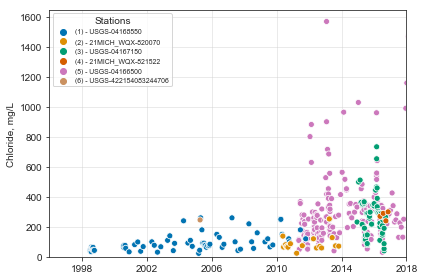

In [19]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_meas.pdf')



In [98]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(1).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &     max \\
MonitoringLocationIdentifier &        &        &        &        &        &        &        &         \\
\midrule
USGS-04168550                &   87.0 &   92.7 &   56.8 &   23.0 &   59.0 &   75.0 &  105.0 &   260.0 \\
21MICH\_WQX-820070            &   17.0 &   88.2 &   50.6 &   24.0 &   65.0 &   71.1 &   87.0 &   252.6 \\
USGS-04167150                &   64.0 &  277.0 &  131.6 &   39.7 &  198.5 &  278.0 &  344.8 &   734.0 \\
21MICH\_WQX-821522            &    4.0 &  275.0 &   26.5 &  240.0 &  262.5 &  280.0 &  292.5 &   300.0 \\
USGS-04166500                &  228.0 &  287.3 &  215.5 &   30.3 &  156.8 &  237.5 &  339.0 &  1570.0 \\
USGS-422154083244706         &    1.0 &  246.0 &    NaN &  246.0 &  246.0 &  246.0 &  246.0 &   246.0 \\
\bottomrule
\end{tabular}



In [47]:
selected_stations

['USGS-04168550',
 '21MICH_WQX-820070',
 'USGS-04167150',
 '21MICH_WQX-821522',
 'USGS-04166500',
 'USGS-422154083244706']

In [48]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(379, 63)

In [49]:
master_st_df.groupby('ActivityStartDate').mean().shape

(263, 6)

In [50]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)



### Discharge

In [55]:
# Finde station here:
# https://www.hydrocloud.org
site = '04166500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [56]:
discharge.columns

Index(['USGS:04166500:00060:00003', 'USGS:04166500:00060:00003_qualifiers'], dtype='object')

In [57]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [58]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [59]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [60]:
# discharge = discharge.append(df_Q_heideleberg)

In [61]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [62]:
river

'Rouge_R'

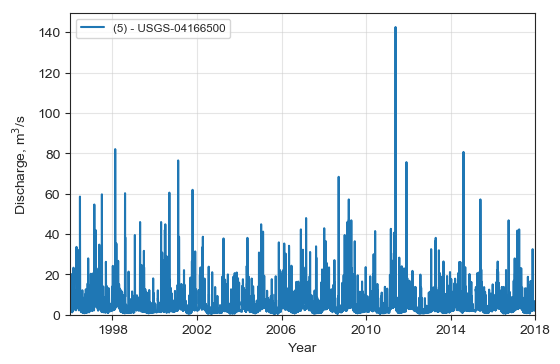

In [64]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(5) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Q.pdf')





In [65]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [66]:
river

'Rouge_R'

In [67]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


In [68]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


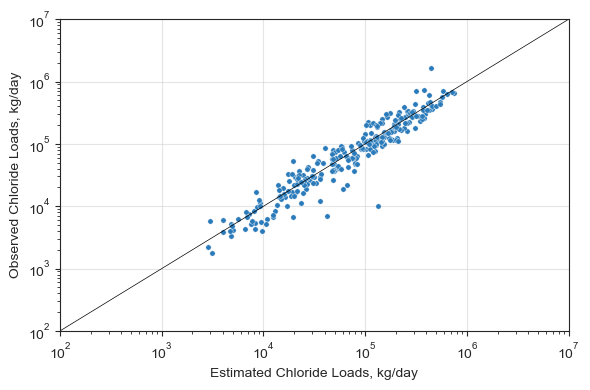

In [70]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
plt.xlim(100,10000000)
plt.ylim(100,10000000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_FvsF.pdf')


In [71]:
EGRET_Daily = EGRET_Daily.drop([4290])

In [72]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [73]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.5,5.128656,53461.5,5.007299,137.500000,1996.374431,1757.007299,137.5,1.199027,5.164081,5.347342,3.820207,0.381617,53.670943,34876.781050,52.784442,33727.304890,12730.025083,4164.509092
1,1997,457.0,5.705030,53781.0,6.526027,183.838356,1997.248146,1767.501370,457.0,1.334638,5.737037,5.684787,3.858524,0.365825,56.442647,43348.442338,52.035143,29607.941284,15822.181453,4993.132830
2,1998,822.0,4.860179,54146.0,6.526027,183.838356,1998.248059,1779.501370,822.0,1.108650,4.867960,4.984132,3.887397,0.374793,56.853995,33545.296566,56.280546,31467.433324,12244.033247,4395.872771
3,1999,1187.0,3.929059,54511.0,6.526027,183.838356,1999.248059,1791.501370,1187.0,0.931739,3.880616,3.875449,3.936195,0.380938,58.587741,26969.971206,60.807789,33444.628581,9844.039490,3506.535799
4,2000,1552.5,4.298281,54876.5,6.513661,183.500000,2000.248661,1803.497268,1552.5,0.947355,4.336070,4.113058,4.022301,0.378958,63.404347,30463.560471,65.700741,35658.308981,11119.199572,3564.523036
5,2001,1918.0,4.193376,55242.0,6.526027,183.838356,2001.248146,1815.501370,1918.0,1.048736,4.189996,4.300168,4.098911,0.389980,69.510751,33009.413489,70.835197,37741.990974,12048.435923,4804.362084
6,2002,2283.0,4.984153,55607.0,6.526027,183.838356,2002.248059,1827.501370,2283.0,1.126793,4.990203,5.053449,4.166486,0.390912,75.223656,40096.489519,76.517585,40108.046222,14635.218674,5681.024207
7,2003,2648.0,2.897450,55972.0,6.526027,183.838356,2003.248059,1839.501370,2648.0,0.659059,2.885426,2.840942,4.237486,0.402194,79.888771,27258.503035,82.967660,42737.259189,9949.353608,4355.895019
8,2004,3013.5,4.257113,56337.5,6.513661,183.500000,2004.248661,1851.497268,3013.5,1.072260,4.278233,4.380417,4.342748,0.422588,89.952405,41065.322054,90.726121,46141.677661,14988.842550,6963.750544
9,2005,3379.0,4.207077,56703.0,6.526027,183.838356,2005.248146,1863.501370,3379.0,1.032112,4.169296,4.084115,4.412247,0.436152,96.855259,45038.656282,98.814256,49714.104173,16439.109543,7563.628423


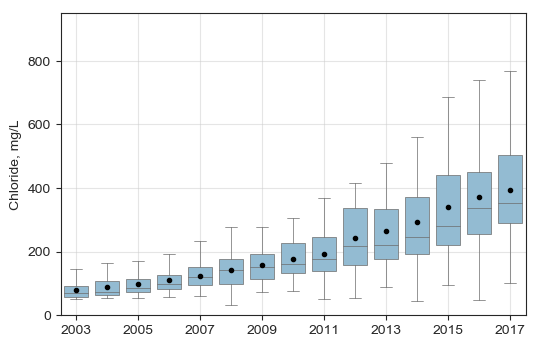

In [74]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl.pdf')




In [75]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
1996,137.5,5.128656,53461.5,5.007299,137.500000,1996.374431,1757.007299,137.5,1.199027,5.164081,5.347342,3.820207,0.381617,53.670943,34876.781050,52.784442,33727.304890,12730.025083,4164.509092
1997,457.0,5.705030,53781.0,6.526027,183.838356,1997.248146,1767.501370,457.0,1.334638,5.737037,5.684787,3.858524,0.365825,56.442647,43348.442338,52.035143,29607.941284,15822.181453,4993.132830
1998,822.0,4.860179,54146.0,6.526027,183.838356,1998.248059,1779.501370,822.0,1.108650,4.867960,4.984132,3.887397,0.374793,56.853995,33545.296566,56.280546,31467.433324,12244.033247,4395.872771
1999,1187.0,3.929059,54511.0,6.526027,183.838356,1999.248059,1791.501370,1187.0,0.931739,3.880616,3.875449,3.936195,0.380938,58.587741,26969.971206,60.807789,33444.628581,9844.039490,3506.535799
2000,1552.5,4.298281,54876.5,6.513661,183.500000,2000.248661,1803.497268,1552.5,0.947355,4.336070,4.113058,4.022301,0.378958,63.404347,30463.560471,65.700741,35658.308981,11119.199572,3564.523036
2001,1918.0,4.193376,55242.0,6.526027,183.838356,2001.248146,1815.501370,1918.0,1.048736,4.189996,4.300168,4.098911,0.389980,69.510751,33009.413489,70.835197,37741.990974,12048.435923,4804.362084
2002,2283.0,4.984153,55607.0,6.526027,183.838356,2002.248059,1827.501370,2283.0,1.126793,4.990203,5.053449,4.166486,0.390912,75.223656,40096.489519,76.517585,40108.046222,14635.218674,5681.024207
2003,2648.0,2.897450,55972.0,6.526027,183.838356,2003.248059,1839.501370,2648.0,0.659059,2.885426,2.840942,4.237486,0.402194,79.888771,27258.503035,82.967660,42737.259189,9949.353608,4355.895019
2004,3013.5,4.257113,56337.5,6.513661,183.500000,2004.248661,1851.497268,3013.5,1.072260,4.278233,4.380417,4.342748,0.422588,89.952405,41065.322054,90.726121,46141.677661,14988.842550,6963.750544


In [76]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




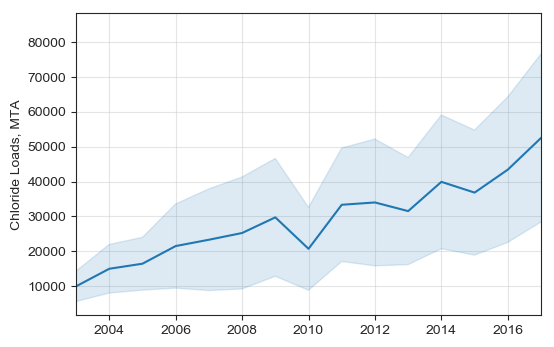

In [77]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_Flux.pdf')


In [101]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     7  &       8  &       9  &       10 &       11 &       12 &       13 &       14 &       15 &       16 &       17 &       18 &       19 &       20 &       21 \\
\midrule
 2003.0 &   2004.0 &   2005.0 &   2006.0 &   2007.0 &   2008.0 &   2009.0 &   2010.0 &   2011.0 &   2012.0 &   2013.0 &   2014.0 &   2015.0 &   2016.0 &   2017.0 \\
 9949.4 &  14988.8 &  16439.1 &  21499.7 &  23310.2 &  25241.6 &  29722.8 &  20712.9 &  33334.7 &  33996.0 &  31518.2 &  39904.6 &  36821.5 &  43402.9 &  52482.3 \\
 4355.9 &   6963.8 &   7563.6 &  12064.5 &  14568.2 &  16040.1 &  16890.0 &  11871.0 &  16264.6 &  18167.8 &  15341.7 &  19157.4 &  17924.2 &  20858.8 &  24079.5 \\
\bottomrule
\end{tabular}



In [79]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,274.0,12730.025083,30122.010385,776.117618,2032.642140,5054.275286,10580.939554,275121.268679
1997,365.0,15822.181453,44793.970067,1134.398595,2673.824270,5146.380832,11171.076413,431580.097302
1998,365.0,12244.033247,33045.219274,800.716055,2415.873500,3917.876868,9549.124412,344384.790011
1999,365.0,9844.039490,27410.563627,913.061911,1715.547187,4223.241337,8130.249817,348457.274575
2000,366.0,11119.199572,27641.379607,1217.531180,2213.368781,3946.984089,8049.243953,346088.943674
2001,365.0,12048.435923,28646.940203,779.927966,2972.117877,5486.004189,10749.702966,294926.868505
2002,365.0,14635.218674,30143.009753,667.639404,3510.500307,7173.456053,13521.760556,315627.235513
2003,365.0,9949.353608,23416.685890,923.606378,2070.195967,3252.169117,8173.373956,323704.070182
2004,366.0,14988.842550,23066.416303,998.232777,3556.497612,6763.073424,14970.987852,161469.623656
